In [1]:
# sys, file and nav packages:
import datetime as dt
import warnings

# math packages:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import nbinom
from scipy import optimize
import math

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines

# images and display
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Image

# set some parameters:
# today = dt.datetime.now().date().strftime("%Y-%m-%d")
start_date = '2015-11-01'
end_date ='2021-11-01'

dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
# dfDims = pd.read_csv("resources/corrected_dims.csv")

# set the index of the beach data to location slug
dfBeaches.set_index('slug', inplace=True)

# all data since 2015
x = pd.read_csv("resources/checked_before_agg_sdata_eos_2020_21.csv")

ldb = x[x.water_name_slug == "lac-leman"].copy()

# assign loc_date
ldb['loc_date'] = list(zip(ldb.location, ldb['date']))

# date to datetime
ldb['date'] = pd.to_datetime(ldb['date'], format="%Y-%m-%d")
ldb["year"] = ldb["date"].dt.year

# agg codes and groups
code = ['G144', 'G96']
fhg = ldb.code.isin(code)

In [2]:
plac = [
    "Prangins",
    "Promenthoux",
    "Nyon",
    "Crans-près-Céligny",
    "Céligny", 
    "Founex",
    "Coppet",
    "Tannay",
    "Mies",
    "Versoix",
    "Genthod",
    "Bellevue",
    "Pregny-Chambésy",
    "Hermance",
    "Anières",
    "Corsier",
    "Collonge-Bellerive",
    "Vésenaz",
    "Cologny",
    "Genève",
]


glac = [
    "Bourg-en-Lavaux",
    "Puidoux", 
    "Cully", 
    "Grandvaux", 
    "Villette (Lavaux)", 
    "Lutry", 
    "Paudex", 
    "Pully", 
    "Lausanne", 
    "Saint-Sulpice (VD)", 
    "Préverenges", 
    "Morges", 
    "Tolochenaz", 
    "St-Prex", 
    "Buchillon", 
    "Allaman", 
    "Perroy", 
    "Rolle", 
    "Bursinel", 
    "Dully", 
    "Gland",
]

hlac = [
    "Noville",
    "Villeneuve (VD)",
    "Veytaux",
    "Territet",
    "Montreux",
    "Clarens",
    "La Tour-de-Peilz",
    "Vevey",
    "Corseaux",
    "St-Saphorin (Lavaux)",
    "Rivaz",
    "Port-Valais",
    "Saint-Gingolph"    
]   

In [3]:
def a_simple_formatted_table(ax,data,colLabels=[], a_color="black", colWidths=[], bbox=[], coded_labels=False, codes=[], font_size=12, **kwargs):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param colLabels: The labels for the data table columns
    :type colLabels: array
    :param a_color: The color of the cell borders
    :type a_color: str
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    a = ax.table(data,  colLabels=colLabels, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    t = make_a_summary_table(a, data, colLabels, a_color=a_color, font_size=font_size, coded_labels=coded_labels, codes=codes)
    return t
def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    return ax
def remove_ticks(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    return ax

# def locations_in_region(dfBeaches=dfBeaches, region=glac):
#     return dfBeaches[dfBeaches.city.isin(glac)].index.to_numpy()

# def locations_in_city(dfBeaches=dfBeaches, city=["Genève"]):
#     return dfBeaches[dfBeaches.city.isin(city)].index.to_numpy()


# The chance of finding an object


_Roger Erismann, Romain Tramoy, Bhavish Patel, Montserrat Filella_ 

__Affiliations__ 

__Roger Erismann__ - Hammerdirt, Brugstrasse 39, CH-2503 Biel, Switzerland 

__Romain Tramoy__ - Laboratoire Eau Environment et Systèmes Urbains (LEESU), 61 Av. du Général de Gaulle, F-94000 Créteil, France 

__Bhavish Patel__ - Paul Scherer Institute (PSI), Forschungsstrasse 111, CH-5232 Villigen PSI, Switzerland 

__Montserrat Filella__ - Department F.-A. Forel, University of Geneva, Boulevard Carl-Vogt 66, CH-1205 Geneva, Switzerland 

__Contact:__ roger@hammerdirt.ch 

Abstract 

[to be completed] 

Keywords: Switzerland, Lake Geneva, Bayes theorem, feminine hygiene products, marine-litter, riverine-input, LCA, marine litter indicator 


## Contents

1. Data and Methods   
   1. Description of the survey area
      1. Description of Lake Geneva
      2. Definition of the locations of interest
      3. Definition of the set of data
   2. Data
      * Description of the data generating process
      * Assumptions and computational methods
   3. Statistical methods
      * Estimating the probability of FHP using the Binomial distribution
      * Role of condtional probability
      * Defining appropriate sources of prior data
      * Example: Determining $\theta_{lake}$ with the survey data
2. Results and discussion
   1. Example of binomial survey results
   2. Numerical definition of the priors
      * Possible interpretations of the survey results
   3. Survey strategy for End Period Plastics
      * Marginal probability and Bayes factor
   4. Environmental policy implications
3. Support materials
   1. List of survey locations and results
   2. Different survey results for different values of $\theta$
   3. Scaling the prior
   4. Ba

## INTRODUCTION 

According to a Brief History of Marine Litter, the first scientifically recorded interaction between marine organisms and persistent litter was in 1969 {cite}`briefhistory`. In 1972 the International Journal of Environmental Studies observed that most of the trash on isolated stretches of ocean shoreline was a result of sea‐borne waste stating that _The waste is primarily a by‐product of international commerce and not the behavior of the casual visitor {cite}`scottdebunksource`_.  This document picks up the trail 50 years later and several hundred miles upstream.  While the harmful effects of plastic are (apparently) debatable, its occurrence on the beach and in the water is undeniable. Volunteers, applying common sense protocols that have been put in place over the past twenty years, have created a very accurate picture of the occurrence of plastics on the beach and on inland lakes and rivers {cite}`greatlakes`.  

The United Nations published a first international guide to collecting ocean beach litter in 2008 {cite}`unepseas`. This publication was followed by another guide developed by OSPAR {cite}`osparguidelines` in 2010 and then, in 2013, the EU published the Guidance on Monitoring Marine Litter in European Seas {cite}`mlwguidance`. Riverine Litter Monitoring - Options and Recommendations was published later, in 2016, as evidence was mounting that rivers are major sources of marine litter {cite}`riverinemonitor`. As a result, thousands of observations have been collected following two very similar protocols {cite}`mlwdata` {cite}`ospardata`. These data are collected by different organizations, mostly volunteer, throughout the European continent. Each observation is a categorical list of objects and their respective quantities within a defined length of shoreline. The same protocol has been in place in Switzerland since November 2015, targeting regional lakes and rivers. {cite}`mlwguidance` {cite}`osparguidelines`. 

The data collected by volunteers were considered fit for the purpose of establishing beach-litter threshold values by the Marine Litter Technical Group of the EU {cite}`eubaselines`. However, the lack of quantitative research on the harmful effects of beach litter, specifically the _dose-effect_ relationship between plastic and ecological harm, precludes the establishment of threshold values based on a health related metric. Quantifying the socio-economic effects prove to be just as diificult. Therefore, threshold values and baselines were adopted according to the _precautionary principle_ {cite}`threshholdeu`. In practice, EU threshold values are determined by using the 15th percentile (20 p/100m) from the combined data set of the 2015-2016 beach litter surveys within the EU. {cite}`threshholdeu`

The presence of objects on the shoreline has also raised concern in the Life Cycle Assessment (LCA) community. The Life Cycle Initiative (LCI) is a public-private partnership that includes France, Switzerland, Germany and the EU with a stated goal of advancing the understanding of life cycle thinking by private and public decision makers. In partnership with Plastics Europe, LCI has been attempting to integrate potential environmental impacts of marine litter, especially plastic, in Life Cycle Assessment (LCA) results.  {cite}`marilca` {cite}`lci`. The consequences of plastic leaked into the environment are not accounted for in the current practice of LCA {cite}`lcaframemli`. This could be for the same reasons that the EU adopted the precautionary principle, as opposed to the dose-effect relationship when developing threshold values.

Considering that the median value was 133 p/100 m in the 2015-2016 beach litter surveys, it means that regional administrations will need to allocate resources to meet the threshold value if they want to achieve good environmental status under the Marine Strategy Framework Directive {cite}`goodenvironmentalstanding`. At the same time, producers are considering the risk of the outcome _marine-litter_ and trying to develop strategies to minimize that risk for their own products {cite}`plasticorglass` {cite}`lcaframemli`. Determining which are the most effective and efficient solutions will require that both stakeholders conduct intermediate assessments based on benchmarks to evaluate progress and compare probable outcomes. This requires having adequate statistical tools to make reasonable assumptions based on the data.

EU thresholds and LCAs, are attempts at reducing the probability of an object being found or identified in the marine environment but none answers the general question _“How likely is an object to be found?”_. End Period Plastics in the UK asked this question in preparation for a meeting with producers of feminine hygiene products (FHP) in Geneva, Switzerland. The team from End Period Plastics was interested in knowing the incidence of these objects in Lake Geneva {cite}`endperiodplastics` and allotted three hours of time to do a beach-litter-survey. Tampon applicators and tampons are part of a group of specific items that are found on beaches all over the continent and most likely originate from toilet flushing or wastewater treatment facilities, cotton-swabs are also part of that group. {cite}`obriain2020116021` {cite}`padbackingstrips` {cite}`increasingplastics`

With the inttention of having a successfull event, succes defined as finding an FHP, hammerdirt staff needed to identify the location that had the highest likelihood of finding an FHP in Geneva. Beach litter monitoring on Lake Geneva started in November 2015 using the MSFD method {cite}`mlwguidance` {cite}`iqaasl`. Data has been collected at irregular intervals all over the lake using the same protocol by different groups since then. Monitoring is also conducted at the Rhône outflow to the Mediteranean at Port Saint Louis near Marseille, France. The resolution to this problem, depends on recognising that an estimation of risk is requested. What follows is a simple but effective application of the Beta-Binomial conjugate model to litter-survey data from a variety of regions and sources to estimate the risk of encountering an FHP in Geneva. The original question, relevant at all times for all locations and objects, can be solved within a specified range of uncertainty using common analytical and programmatic methods with the data on hand.


## DATA AND METHODS 

### Study sites 

Lake Geneva is a perialpine lake at an altitude of 372 m above mean sea level located between France and Switzerland. It has an elongated shape, a surface area of 580 km2, and maximum length and width of 72.3 and 14 km, respectively. The average water residence time is 11.3 years. The lake is subdivided into two sub-basins: the Grand Lac (large lake) (309 m deep) and the Petit Lac (small lake) (medium-sized basin with a volume of 3 km3 and a maximum depth of about 70 m.  Lake Geneva is fed by a large number of rivers and streams but most of the water enters through the Rhône River. The permanent population (2011) in its watershed is: 1,083,431 (France: 142,229, Switzerland: 941,202) but also hosts a large tourism population. There are 171 wastewater treatment plants (population equivalent: 3,009,830). {cite}`cipel2019` 

The focus of this study is Geneva beaches (baby-plage, baby-plage-II, Jardin-botanique, rocky-plage, villa-barton), which are located in the Petit Lac (Map 1). However, the method applies to all locations equally, therefore all the available data collected on Lake Geneva, using the same protocol, is considered in the evaluation of the risk {cite}`iqaasl`. A reference set of data from the city of Port Saint Louis which is at the mouth of the Rhône where it discharges into the sea will be presented with aggregated results of the lake. {cite}`merter`.  

#### __Map one: survey locations in the Petite and Grand lac, November 2015 - Novemeber 2021__

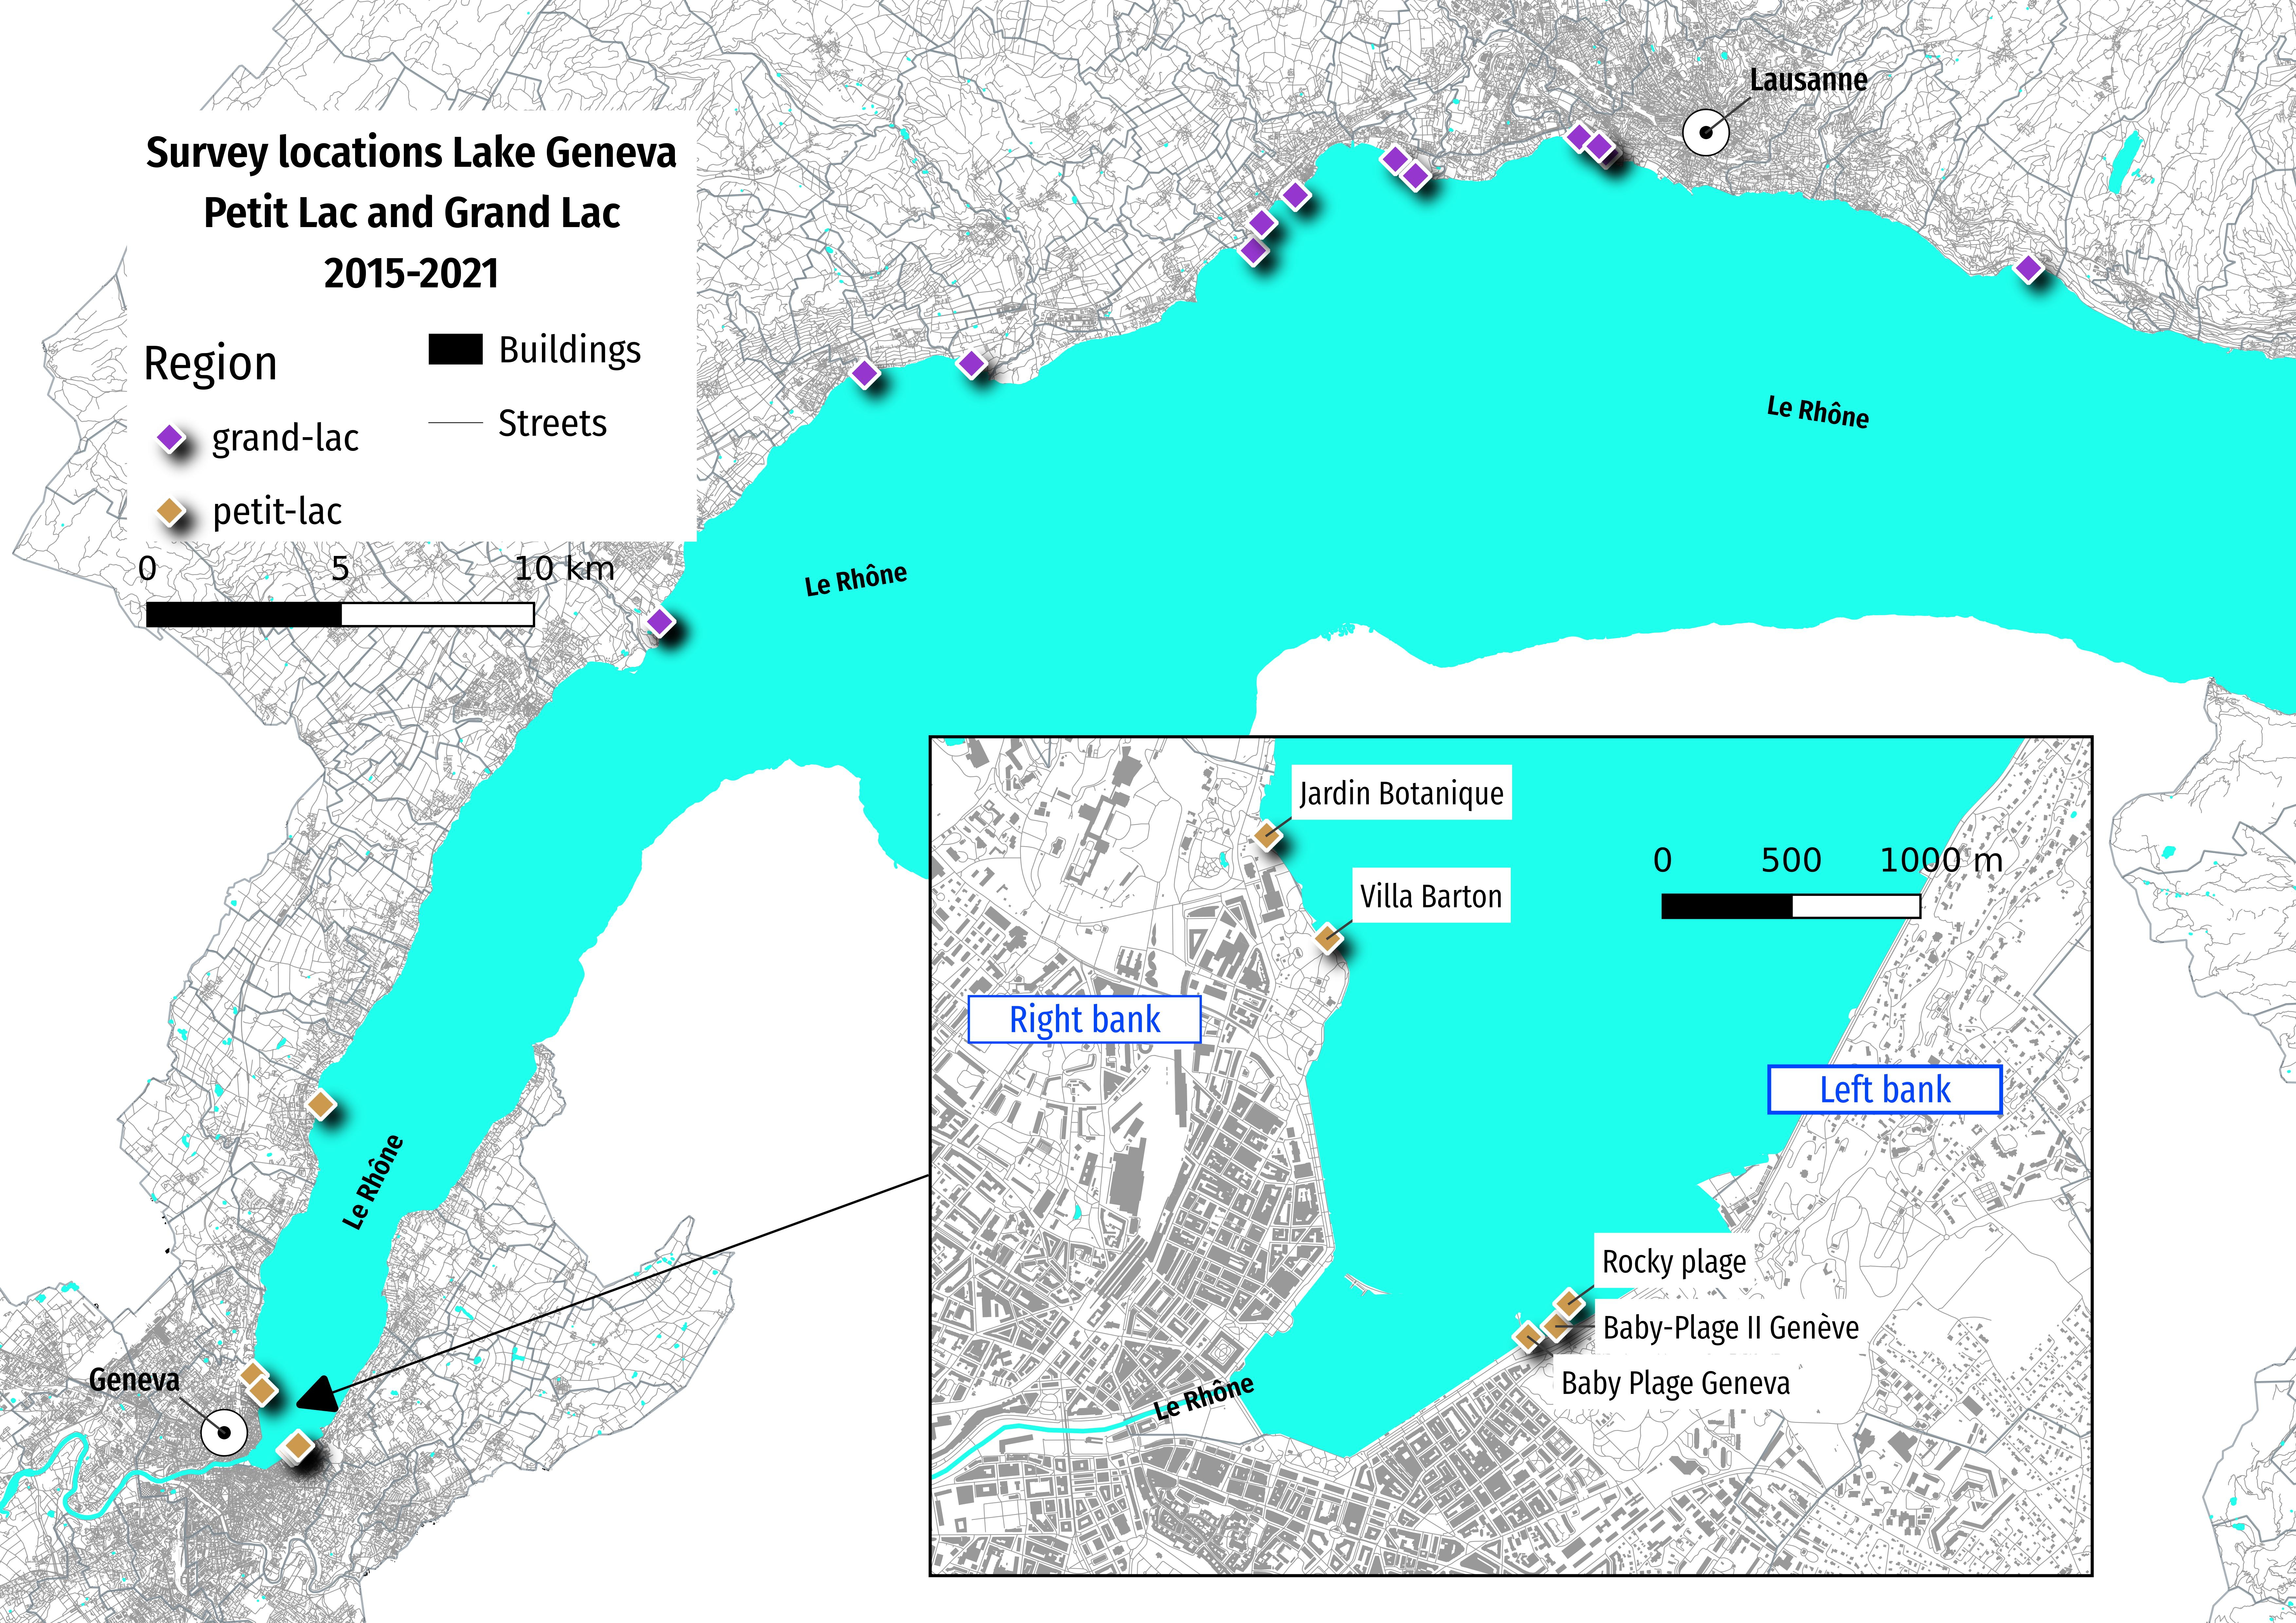

In [4]:
display(Image("resources/images/fhg_map.jpeg"))

In [5]:
jfhg = ldb[ldb.code.isin(code)]
jfhg_c = jfhg.groupby(["loc_date", "location","city","date"], as_index=False).agg({"quantity":"sum", "fail":"sum"})

# select by quantity > 2
qs = ['one','two','three','four','five','six','seven','eight','nine', 'ten', '15', '20']
qsindex = np.arange(len(qs))
qsindex = [*qsindex, 14, 19]
for i,aq in enumerate(qs):
    prefix = "plus"
    new_column = f"{prefix}_{aq}"
    jfhg_c[new_column] = jfhg_c.quantity.map(lambda x: x > qsindex[i]+1)

# make fail a boolean for > 0
jfhg_c["fail"] = jfhg_c.fail.where( jfhg_c.fail.isin([0,1]), 1)

# label the sampling period for each location
# assign a period to each sample
# period one
p_o_s = "2015-11-15"
p_o_e = "2017-03-31"

# period two
p_t_s = "2017-04-01"
p_t_e = "2018-05-01"
ptwo = (jfhg_c["date"] >= p_t_s) & (jfhg_c["date"] <= p_t_e) 
ldbtwo = (ldb["date"] >= p_t_s) & (ldb["date"] <= p_t_e)

# period three
p_th_s = "2021-11-01"
pthree = (jfhg_c['date'] > p_t_e) &(jfhg_c['date'] <= p_th_s)
ldbthree = (ldb['date'] > p_t_e) &(ldb['date'] <= p_th_s)

jfhg_c['period'] = 1
jfhg_c.loc[ptwo, 'period'] = 2
jfhg_c.loc[pthree, 'period'] = 3

ldb['period'] = 1
ldb.loc[ldbtwo, 'period'] = 2
ldb.loc[ldbthree, 'period'] = 3

# aggregate to location
T_locations = jfhg_c.groupby(["location", "period", "city"], as_index=False).agg({"loc_date":"nunique", "fail":"sum", "plus_two":"sum"})

# lake totals by period
T_lake = T_locations.groupby(["period", "city"], as_index=False).agg({"loc_date":"sum", "fail":"sum", "plus_two":"sum"})
T_lake["alpha_beta"] = list(zip(T_lake.fail, T_lake.loc_date))
T_lake["k"] = T_lake.loc_date - T_lake.fail
T_lake["alpha_k"] = list(zip(T_lake.fail, T_lake.k))
T_lake["k_plus_two"] = T_lake.loc_date - T_lake.plus_two
T_lake["alpha_plus_two"] = list(zip(T_lake.plus_two, T_lake.k_plus_two))

T_p3 = T_lake[T_lake.period == 3].copy()

# name the variables
left_bank = ["baby-plage-geneva", "rocky-plage", "baby-plage-ii-geneve"]
right_bank = ["villa-barton", "jardin-botanique"]

# geneva totals by location
T_geneva = T_locations[T_locations.location.isin([*left_bank, *right_bank])].copy()
T_glocations =  T_geneva.groupby(["location", "period"], as_index=False).agg({"loc_date":"sum", "fail":"sum", "plus_two":"sum"})

# geneva totals by left or right bank
T_geneva["bank"] = "right"
T_geneva.loc[T_geneva.location.isin(left_bank), "bank"] = "left"
T_banks = T_geneva.groupby(["bank", "period"], as_index=False).agg({"loc_date":"sum", "fail":"sum", "plus_two":"sum"})

periods = jfhg_c.period.unique()
threshold = "fail"

def n_minust(data, periods, threshold, label):
    
    ns_and_ts = []
    for period in periods:
        
        if period in data.period.unique():
            n, t = data.loc[data.period == period].loc_date.sum(), data.loc[data.period == period][threshold].sum()
        else:
            n, t = 0, 0

        n_minus_t = n-t
        ns_and_ts.append((period, n , t, n_minus_t, label))

    return ns_and_ts

def define_t(ns_ts, make_k, label):    
    
    new_data = []
    for n_and_t in ns_ts:
        
        if make_k:
            tally= n_and_t[3]
        else:
            tally=n_and_t[1]
    
        new_data.append(dict(period=n_and_t[0], alpha=n_and_t[2], beta=tally, name=label["value"]))
    return new_data


def make_df_from_ns_ts(data, data_frame, labels=[], periods=periods, threshold=threshold, n_minust=n_minust, make_k=False):
    
    new_data = []
    for label in labels:
        
        ns_ts = n_minust(data[data[label["column"]] == label["value"]], periods, threshold, label)
        labeled_data = define_t(ns_ts, make_k, label)
        new_data += labeled_data
        
    new_df = pd.DataFrame(new_data)  
    
    return new_df


def make_tuples(data):
    
    data["alpha_beta"] = list(zip(data.alpha, data.beta))
    
    data = data.pivot(index="name", columns=["period"], values=["alpha_beta"]).reset_index().values
    
    return data
    

def update_betas(new_data, prior_data):
    
    updated = (prior_data[0]+new_data[0], prior_data[1]+new_data[1])
    
    return updated

def add_up_betas(array_of_tuples, prior=(1,1), index=1):
    
    new_array = []
    for i in np.arange(len(array_of_tuples)):
        a = array_of_tuples[i]
        
        a_t = tuple(map(sum, zip(*a[1:])))
        
        update = ((a_t[0] + prior[0]), (a_t[1] + prior[1]))
        new_array.append([*a, a_t, prior, update])
        
    return new_array

def make_posterior(array_of_tuples, afunc, args=-1):
    
    ags = array_of_tuples[args]
    this_dist = afunc(ags[0], ags[1])
    mean, var, interval = this_dist.mean(), this_dist.var(), (this_dist.ppf(0.05), this_dist.ppf(0.95))
    
    return dict(args=ags, mean=mean, var=var, interval=interval, this_dist=this_dist)


def minimize_alpha_beta(x, mu, var):
    
    alpha, beta = x[0], x[1]
    
    return [alpha/(alpha+beta) - mu, (alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1)) - var]

def make_tuples_from_df(data, data_frame, threshold=[], labels=[], make_k=True):
    
    a = make_df_from_ns_ts(data, data_frame, labels=labels, threshold=threshold, make_k=make_k)
    b = make_tuples(a)
    
    return b

def make_betas_and_dists(data, func, prior=(1,1), index=-2, args=-1):
    
    a = add_up_betas(data, prior=prior, index=index)
    d = {x[0]:make_posterior(x, func, args=args) for x in a}
    
    return a, d

def make_posterior_and_array_of_results(data, beta, labels=[], prior=(), index_arg = (-2, -1), make_tuples=make_tuples, make_df_from_ns_ts=make_df_from_ns_ts, data_frame='an empty data frame', threshold="list", make_k=True):
    
    if len(data) > 1:
        collect = []
        for i,d in enumerate(data):
            labelsi = labels[i]
            new_tuples = make_tuples_from_df(d, data_frame, labels=labelsi, threshold=threshold, make_k=make_k)
            collect.extend(new_tuples)        
        
        som_tups, dists = make_betas_and_dists(collect, beta, prior=prior, index=index_arg[0], args=index_arg[1])
    else:
        labels=labels[0]
        data=data[0]
        new_tuples = make_tuples(make_df_from_ns_ts(data, data_frame, labels=labels, threshold=threshold, make_k=make_k))
        som_tups, dists = make_betas_and_dists(new_tuples, beta, prior=prior, index=index_arg[0], args=index_arg[1])
        
    
    return som_tups, dists

# an empty dataframe to capture results
data_frame = pd.DataFrame()

# threshold
threshold = "fail"

labelsone=[{"column": "location", "value":x} for x in T_geneva.location.unique()]
labelstwo = [{"column": "bank", "value":x} for x in T_banks.bank.unique()]

# define the values for the lake
lake_alpha_k = ["lake", *T_lake.alpha_k.values]
lkx = add_up_betas([lake_alpha_k])
dists_lk = {x[0]:make_posterior(x[1:], beta, args=-1) for x in lkx}

# define the values for period _ three
p3_alpha_k = ["lake", *T_p3.alpha_k.values]
p3x = add_up_betas([p3_alpha_k])
dists_p3 = {x[0]:make_posterior(x[1:], beta, args=-1) for x in p3x}

prior_one = dists_lk["lake"]["args"]
p3_prior = dists_p3["lake"]["args"]

# scaled prior
# get the mean from the lake posterior and set variance to a limit
mu = dists_lk["lake"]["mean"]
var = 0.01

# scale the prior for FHP > 0
scaled_prior_one = optimize.root(minimize_alpha_beta, [1, 1], args=(mu, var)).x

# define the posterior for each sampling period and get the posterior dist for the combined values
g_l_p, dists_l = make_posterior_and_array_of_results([T_glocations, T_banks], beta, labels=[labelsone, labelstwo], prior=prior_one, threshold=threshold)
g_b_p, dists_b = make_posterior_and_array_of_results([T_glocations, T_banks], beta, labels=[labelsone, labelstwo], prior=(1,1), threshold=threshold)

# theta with a scaled prior
g_l_lp, dists_lp = make_posterior_and_array_of_results([T_glocations, T_banks], beta, labels=[labelsone, labelstwo], prior=scaled_prior_one, threshold=threshold)

# theta with just period three as a prior
g_p3, dists_gp3 = make_posterior_and_array_of_results([T_glocations, T_banks],
                                                      beta,
                                                      labels=[labelsone, labelstwo],
                                                      prior=p3_prior,
                                                      threshold=threshold)
# theta FHP > 2 solve for the threshold value with scaled prior
threshold="plus_two"

g_l_p2, dists_l2 = make_posterior_and_array_of_results([T_glocations, T_banks],beta,
                                                       labels=[labelsone, labelstwo],
                                                       prior=scaled_prior_one,
                                                       threshold=threshold)
# data for saint sulpice
threshold="fail"
saint_sulpice = dfBeaches[dfBeaches.city == 'Saint-Sulpice (VD)'].index
# saint sulpice totals by location
T_saint = T_locations[T_locations.location.isin(saint_sulpice)].copy()
T_slocations =  T_saint.groupby(["location", "period"], as_index=False).agg({"loc_date":"sum", "fail":"sum", "plus_two":"sum"})

labelsSaintSulpice=[{"column": "location", "value":x} for x in T_saint.location.unique()]
# saint_n_k = make_tuples_from_df(T_slocations, data_frame, labels=labelsSaintSulpice, threshold=threshold, make_k=True)

s_l_p, dists_saint_l =  make_posterior_and_array_of_results([T_slocations], beta, labels=[labelsSaintSulpice], prior=prior_one, threshold=threshold)
s_b_p, dists_saint_b = make_posterior_and_array_of_results([T_slocations], beta, labels=[labelsSaintSulpice], prior=(1,1), threshold=threshold)
s_l_pscaled, dists_saint_lscaled = make_posterior_and_array_of_results([T_slocations], beta, labels=[labelsSaintSulpice], prior=scaled_prior_one, threshold=threshold)

threshold="plus_two"
s_l_p2, dists_lp2 = make_posterior_and_array_of_results([T_slocations], beta, labels=[labelsSaintSulpice], prior=scaled_prior_one, threshold=threshold)

### Data 

Between November 2015 and November 2021 there were 250 beach-litter surveys at 38 different locations, [S1: locations and survey results](s1). In total, 78,104 objects were removed and identified, of which 358 objects were either tampons or tampon applicators (0.45) {cite}`iqaasl`. FHP were present in 103 samples (41%). There are three separate sampling periods, each sampling period represents an initiative or campaign. The sampling periods are not of the same length nor is the sampling frequency fixed, except for a few specific locations in periods two and three.

1. Project one: 2015-11-15 to 2017-03-01; the first project on Lac Léman (MCBP)
2. Project two: 2017-04-01 to 2018-05-01; the Swiss Litter Report (SLR) 
3. Project three: 2020-03-01 to 2021-11-01; the start of IQAASL up to two weeks before the survey with End Period Plastics

__Assumptions__ 

1. The samples are independent and identically distributed 
2. $\theta$ is approximately equal for all locations which is the expected value for the lake 
3. The expected result for the lake, $\theta_{lake}$, or the region is the best estimate for locations without samples 
4. Exchangeability of data {cite}`bayesgelman` 

__Computational methods__

The Beta - Binomial conjugate model is used to determine the probable ratio of the number of times an object is found versus not found for each location. The Beta distribution is conjugate to the Binomial distribution which results in a proper posterior distribution that can be solved analytically {cite}`bayeskruschke`  {cite}`bayesdowney` {cite}`bayespilon`. The implementation is done with  SciPy v1.7 {cite}`scipy` and pandas v1.34 {cite}`reback2020pandas` all running in a Python v3.7 {cite}`python` environment. 

The data and methods are available in the repository: https://github.com/hammerdirt-analyst/finding-one-object 

## Statistical methods 

The __Beta - Binomial conjugate model__ is developed in the context of the beach-litter survey data in _Eqs.(1-17)_. The Binomial distribution _Eqs.(1-3)_ can be used to approximate the discrete probability distribution of the number of times that an FHP was found given the number of beach-litter surveys completed. The results of the beach litter surveys can be described by the probability mass function (PMF) of the Binomial ditribution, let T be a random binomial variable and _let t = 1 = an FHP was found_, or _t = 0 = an FHP was not found_ and let _n = the number of surveys_ _Eq.(1)_.

$$
\begin{align}
T = f(t,n,\theta) = Pr(t; n, \theta) = Pr(X=t) &= {n\choose t}\theta^t(1-\theta)^{n-t},\quad 0\leq t\leq n, n\geq 0,\quad \theta= t/n \tag{1} \\[12pt]
&= {250\choose 103}\theta^{103}(1-\theta)^{250-103} \tag{2} \\[12pt]
&= \theta^{103}(1-\theta)^{147} \tag{3}
\end{align}
$$

$$ E[T] = 103,\ Var(T) = 61 $$

The value of $\theta$ is not given in the data, in most cases it is assumed to be $\approxeq$  t/n. Substituting in the values from the data _Eq.(2)_ and assuming that $\theta$ = t/n results in an expected value of 103 positive samples with variance of +/- 61 samples. However the true value of $\theta$, if one exists, is most likely different than the survey results. For example if the true value of $\theta$ is equal to 0.3 then the expected number of positive surveys would be $\approxeq$ 75, [S2: changes in the value of t/n](s2), which could have easily ocurred given the expected variance of T = $E[Var(T)]$ = 61. To get an answer for $\theta$ from the data, which is the quantity in question, consider that: (i) $\theta$ is a random variable, (ii) $\theta$ is defined between 0 and 1 (iii) $\theta$ is a ratio of the sample space (iiii) $\theta$ depends on the survey results {cite}`bayesdowney` {cite}`jaynes`. Therefore the expected values of T and $\theta$ are conditional probabilities where the value of one could change the value of the other _Eq.(4)_. Solving _Eq.(4)_ for $\theta$ gives _Eq.(5)_, which allows the inference of $\theta$ from the data. 

$$
\begin{align}
P(T|\theta) &= \frac{P(\theta|T)P(T)}{P(\theta)} \tag{4} \\[12pt]
P(\theta|T) &= \frac{P(T|\theta)P(\theta)}{P(T)} \tag{5} \\[12pt]
Posterior\ distribution &= \frac{Likelihood\ *\ Prior}{Marginal\ probability} \tag{6} \\[12pt]
\end{align}
$$

Probability notation is deceptively easy to resolve and the notion of prior knowledge is captured in the second expression of the numerator $P(T)$  _Eq.(4)_ or $P(\theta)$  _Eq.(5)_  which is the key to Bayes rule _Eqs.(4-6)_. The prior relates any appropriate additional information about the unknown variable to the current likelihood _Eq.(6)_ {cite}`jaynes` {cite}`bayesgelman` {cite}`bayeskruschke`. The posterior distribution is the result of combining the prior with the likelihood and dividing the product by the _marginal probability_ of T _Eq.(6)_. The term prior is by convention and does not imply that the information was obtained prior to the samples {cite}`jaynes`. Rather than assume the value of $\theta$ is t/n,  it can be inferred or estimated from the data using _Eq.(5)_.

__Prior knowledge__

While the definition of the prior could allow for the introduction of arbitrary data, _in this analysis it is restricted to the provided beach-litter survey results or if there are no survey results then the prior information is considered uninformative_. As an example consider the state of knowledge about the incidence of FHP before sampling started on Lake Geneva. Prior to 2015 there was no organized data collection of beach litter, the presence of litter had been established but the quantities were given in kilograms and used primarily for awareness campaigns. From this it could be infered that the prior probability of FHP was > 0 and < 1, any assumption beyond that could not be supported. Thus, the _prior_ to November 2015 is the uniform probability distribution defined as $Beta(\alpha=1, \beta=1)$. {cite}`bayesdowney` {cite}`catalogofpriors` {cite}`jaynes` {cite}`noninformativepriors`

Recall that assumptions two and three state that the expected value for the lake is the expected value for all locations and in the abscence of data then the expected value of the lake is the best estimate for any unique location. This means that the survey results from the rest of the lake should be considered when evaluating $P(\theta)$ for a unique location. The __prior__ is one method for introducing this additional knowledge into the assessment of $P(\theta)$ at any specific location. How the prior data is incorporated and the impact on the assessment of $P(\theta)$ for individual survey locations is covered in the results and discussion section.

__The probability of $\theta$ given the data__

In a Bayesian model if the posterior distribution $P(\theta|T)$ is in the same family as the prior distribution $P(\theta)$ then they are called _conjugate distributions_. The result is a closed form expression that does not involve numerical integration {cite}`bayesgelman` {cite}`jaynes`. Using   _Eq.(5)_ and substituting in values for the _Likelihood_  _Eq.(7)_ and the _Prior_  _Eq.(8)_, the product of the numerator  _Eq.(9)_ can be obtained by combining the like terms and adding up the exponents  _Eq.(10)_. Even though data has been added to the equation through the prior, the result is the same as  _Eq.(3)_.

$$
\begin{align}
\text{Likelihood} &= {250\choose 103}\theta^{103} (1-\theta)^{250-103} \tag{7} \\[12pt]
\text{Prior} &= \frac{1}{Beta(1,1)}\theta^{1-1}(1-\theta)^{1-1} \tag{8} \\[12pt]
\text{Likelihood * Prior} &= \frac{1}{Beta(1, 1)} {250\choose 103} \theta^{1 + 103-1}(1-\theta)^{1 + 250 - 103 -1} \tag{9} \\[12pt]
&= \theta^{103}(1-\theta)^{147} \tag{10} \\[12pt]
\end{align}
$$

The form of equation  _Eq.(10)_ is the same as  _Eq.(3)_ not including the constants. Determining the _marginal probability_ of T  _Eq.(6)_ requires integrating  _Eq.(10)_, creating a normalizing constant that ensures the area under the curve defined by  _Eq.(10)_ sums to one. Recall the identity $\frac{1}{Beta(\alpha,\beta)} = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}$ and that the integral of the Beta distribution = 1 by definition {cite}`wolframbeta`.

$$
\begin{align}
\text{Marginal probability} &= P(T) \tag{11} \\[12pt]
&= \int_{0}^{1} f(\theta)g(t|\theta) d\theta \tag{12} \\[12pt]
&= \frac{1}{Beta(1, 1)} {250\choose 103} \int_{0}^{1} \theta^{103}(1-\theta)^{147} d\theta \tag{13} \\[12pt]
&= \frac{1}{Beta(1, 1)} {250\choose 103} \frac{\Gamma(104) \Gamma(148)}{\Gamma(252)} \tag{14} \\[12pt]
\end{align}
$$

The posterior distirbution is solved by recognising that the constants cancel _Eq.(15)_ and dividing the numerator by the integral of the Beta distribution. The resulting expression is another Beta distribution _Eq.(17)_.

$$
\begin{align}
\text{Posterior distribution} &= \frac{
                        \frac{1}{Beta(1, 1)} {250\choose 103} \theta^{103}(1-\theta)^{147}
                        }
                        {
                        \frac{1}{Beta(1, 1)} {250\choose 103} \frac{\Gamma(104) \Gamma( 148)}{\Gamma(252)}
                        } \tag{15} \\[14pt]
&= \frac{\Gamma(252)}{\Gamma(104) \Gamma(148)}\theta^{103}(1-\theta)^{147} \tag{16} \\[12pt]
&= \frac{1}{Beta(104, 148)} \theta^{103}(1-\theta)^{147} \tag{17} \\[12pt]
\end{align}
$$

$$P(\theta_{lake}|T) = Beta(103, 147),\ E[\theta_{lake}] = 0.41,\ Var(\theta_{lake}) = .001$$

The expression for the posterior distribution P($\theta$|T)  _Eq.(17)_ is in the same form as the prior  _Eq.(8)_ and includes the parameters from both the _prior_ and the _likelihood_. This property is part of the definition of conjugacy and means that updating the value P($\theta$|T) can be done using the _prior_ in a straightforward, transparent and predictable manner. Most importantly the answer to the original question is provided directly and requires no further manipulation of the data. Given assumption two, the results from _Eq.(17)_ should be considered an initial assessment of the probability of finding an FHP in Geneva. This process is repeated for each location that has survey data on the lake, using these initial aggregated survey results as the prior. All of the probability distributions and their respective PMFs or PDFs that have been used so far are included in the SciPy package {cite}`scipy` and can be implemented in an itterative process. How the beach litter data is used to update the expected value for each location and how $P(\theta_{lake})$ is used to determinine the risk of encountering an object at specific locations is addressed in the next section.

In [6]:
ldb_p3 = ldb[ldbthree]

total_p3 = ldb_p3.quantity.sum()
samp_p3 = ldb_p3.loc_date.nunique()

genf = ldb[(ldbthree)&(ldb.code.isin(code))]
g_found = genf.groupby(["loc_date", "code"], as_index=False).agg({"quantity": "sum"})
g_found[g_found.quantity > 0].groupby("code").agg({"quantity":"sum", "loc_date":"nunique"})

g144 = genf[(genf.code == "G144")&(genf.quantity > 0)]
g96 = genf[(genf.code == "G96")&(genf.quantity > 0)]
# both = genf[(genf.code.isin(

only_144 = list(set(g144.loc_date.unique()) - set(g96.loc_date.unique()))
only_96 = list(set(g96.loc_date.unique()) - set(g144.loc_date.unique()))
together = list(set(g144.loc_date.unique()) & set(g96.loc_date.unique()))

ratio_q = (g144.quantity.sum() + g96.quantity.sum())/total_p3
ratio_s = (len(only_144)+len(only_96)+len(together))/samp_p3

alpha = (len(only_144)+len(only_96)+len(together))
n = samp_p3
k = n - alpha

p3_dist = beta(alpha, k)

mean, var, interval = p3_dist.mean(), p3_dist.var(), (p3_dist.ppf(0.05), p3_dist.ppf(0.95))

find_together = (genf.location.isin([together[0][0]]))&(genf["date"] == together[0][1])

found_together = genf[find_together]

## Results and discussion

For the last sampling period, ending November 2021, 81 applicators (G96) and 14 tampons (G144) were identified out of 31'202 objects or 0.003 of all objects counted. At least one FHP was identified in 42 out of 109 samples or t/n = .385, within the 90% interval of $\theta_{lake}$. The results for Geneva proper are summarized by the five locations with samples and a cumulative tally for the left and right bank, Table 1. {cite}`zenodo`

$$ \text{Table 1}: \text{t,n at the end of each sampling period for Geneva beaches.} $$

| location           | period 1 (t,n)  | period 2 (t,n)  | period 3 (t,n) | total (t,n)  |
| ---                | :---:           | :---:           | :---:          | :---:        |   
| left-bank          | (0, 0)          | (0, 0)          |(3, 14)         |(3, 14)       |
| right-bank         | (3, 13)         | (0, 0)          |(1, 2)          |(4, 15)       |
|jardin-botanique    | (2, 3)          | (0, 0)          |(0, 0)          |(2, 3)        |
|villa-barton        | (1, 10)         | (0, 0)          |(1, 2)          |(2, 12)       |
|baby-plage-geneva   | (0, 0)          | (0, 0)          |(3, 11)         |(3, 11)       |
|rocky_plage         | (0, 0)          | (0, 0)          |(0, 1)          |(0, 1)        |
|baby-plage-ii-geneve| (0, 0)          | (0, 0)          |(0, 2)          |(0, 2)        |

__Defining the priors and the model__

There are now two estimates for $\theta$: (i) $\theta_{lake}$ and (ii) $\theta_{period-3}$, where $E[\theta_{period-3}]$ is within the 90% HDI of $E[\theta_{lake}]$. If the results are grouped according to survey location (Table 1) there are five different estimates for $\theta_{location}$ in Geneva. The basic assumption is that $\theta_{lake}$ has an effect on $\theta_{location}$ (assumtpions 2 and 3) but the magnitude of that effect is unknown. To account for that uncertainty the values of the parameters for $\theta_{lake}$ will be considered under the two conditions defined by the relationship in _Eq.(18)_ [S3: scaling the prior](s3).

$$\theta_{lake} = E[Beta(104,148)] \approxeq .41 \approxeq E[Beta(9.59, 13.64)] = \theta_{scaled} \tag{18}$$

The probability of finding an object at any particular location given a set of beach-litter-data could be defined according to (19). Depending on how relavent the cumulative data is depends on the size of the paramaters used in the __prior__. In the lake example  _Eqs.(7-15)_ $Beta(1, 1)$ was used to define the prior for the aggregate value of all the lake data. By considering the uninformed prior it is possible to see how the different regional values effect the posterior distribution for a single location, Tables 2-5, and Figures 1 - 4. 

$$
\begin{align}
P(\theta_{location} | Data) = \frac{P(Data | \theta_{location})P(\theta_{l})}{P(Data)},  
P(\theta_{l}) = 
\begin{cases} 
\text{case 1} = Beta(104,148), & \text{lake values} \\ 
\text{case 2} = Beta(9.59, 13.64), & \text{scaled} \\ 
\text{case 3} = Beta(42, 67), & \text{period three} \\ 
\text{case 4} = Beta(1,1), & \text{uninformed} \\ 
\end{cases}
\tag{19} \\
\end{align}
$$

Considering the map of surface currents of Lake Geneva {cite}`mapofsurfacecurrents`, the topography of the shoreline and the density of plastic tampon applicators {cite}`greatlakes`, it is reasonable to assume that regional differences could be very significant. There is also large disparity for the value of n at any specific location with regards to aggregate values. This difference can best be seen by comparing Figure 3 to Figure 1, where the average values for all locations are drawn to $E[\theta_{lake}]$ and it is almost impossible to tell the difference between each location in Figure 1, but in figure three it seems that uncertainty is maximized.

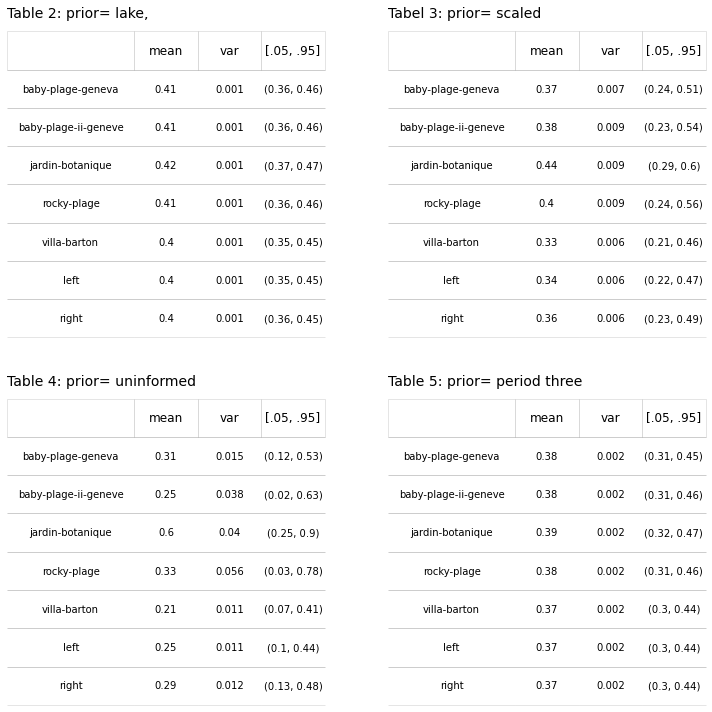

In [7]:
datas = [ dists_l,  dists_lp, dists_b, dists_gp3]
data_tuples = [g_l_p, g_l_lp, g_b_p, g_p3]

def make_tables_from_different_priors(data, orient="index", columns= ["mean", "var", "interval"], places=[2,3,2]):
    a = pd.DataFrame.from_dict(data, orient=orient)[columns]
    
    for i, col in enumerate(columns):
        if col == "interval":
            a[columns[i]] = a[columns[i]].map(lambda x: (round(x[0], 2), round(x[1], 2)))
        else:
            a[columns[i]] = np.round(a[columns[i]], places[i])
            
        
    table_data = a.reset_index()
    
    return table_data
def make_a_summary_table(ax, data,colLabels, a_color="black", font_size=12, coded_labels=False, codes=[]):
    
    """Formats matplotlib table object.

    Args:
    ax: object: matplotlib table object
    data: array: the 2d array used to generate the table object
    cols_to_use: array: the list of column names
    a_color: str: matplotlib named color, face and edgecolor of table cells
    font_size: int: the font size for the table cells
    s_et_bottom_row: bool: whether or not to draw bottom line on the last row

    Returns:
    The table object formatted.
    """

    ax.auto_set_font_size(False)
    the_cells = ax.get_celld()

    line_color = mcolors.to_rgba(a_color)
    banded_color = (*line_color[:-1], 0.1)

    # the different areas of formatting
    top_row = [(0, i) for i in np.arange(len(colLabels))]
    data_rows = [x for x in list(the_cells.keys()) if x not in top_row]
    
    if coded_labels:
        for i, a_cell in enumerate(top_row):
            ax[a_cell].get_text().set_text("")
            
            cell_color = mcolors.to_rgba(codes[i])
            c_color = (*cell_color[:-1], 0.6)
            ax[a_cell].set_facecolor(c_color)
            ax[a_cell].set_linewidth = 1
            ax[a_cell].set_height( .4/ (len(data)))        
        
    else:
        for i, a_cell in enumerate(top_row):
            ax[a_cell].visible_edges = "closed"
            ax[a_cell].set_text_props(**{"fontsize": font_size})
            ax[a_cell].set_edgecolor( banded_color)
            
            
            ax[a_cell].PAD = .2
            ax[a_cell].set_linewidth = 1
            ax[a_cell].set_height(.5 / (len(data)))

    for a_cell in data_rows:
        ax[a_cell].set_height(.5 / (len(data)))
        ax[a_cell].visible_edges = "BT"
        ax[a_cell].set_text_props(**{"fontsize": font_size-2})
        ax[a_cell].set_edgecolor(banded_color)
        ax[a_cell]._text.set_horizontalalignment("center")
        ax[a_cell].set_linewidth = .6  

    return ax


new_data = [make_tables_from_different_priors(x) for x in datas]
chart_titles=["Table 2: prior= lake, ", "Tabel 3: prior= scaled ",   "Table 4: prior= uninformed",   "Table 5: prior= period three",]

figsize=(10,10)


fig, axs = plt.subplots(2,2, figsize=figsize)

chart_axs = [[0,0], [0,1],[1,0], [1,1]]
for j,some_data in enumerate(new_data):
    row,col = chart_axs[j]
    ax  = axs[row, col]
    a_simple_formatted_table(ax,some_data.values,colLabels=["", *some_data.columns[1:-1], "[.05, .95]"], a_color="black", colWidths=[.4, *[.2]*3], coded_labels=False, bbox=[0,0,1,1])
    remove_spines(ax)
    remove_ticks(ax)
    ax.set_title(chart_titles[j], fontsize=14, pad=14, loc="left")
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

The posterior distribution should be a compromise between the prior and the likelihood {cite}`jaynes` {cite}`bayesrules`. The results in table two and table five have similar characteristics, with the mean value shifted to the left three points. The variance and the 90% HDI are essentialy the same at each location as a result there is very little difference in the mean value between each location. This would be a very litteral interpretation of assumption two, that effectvely minimizes the significance of the local survey results in relation to the aggregated results. For generalizing the conditions on the lake this is an adequate estimation and the results in Table 2 are reassuring because they all fall within the range of expected values predicted in the previous section. At the local level under case 4, Table 4 and Figure 3, the results are more heterogenous.

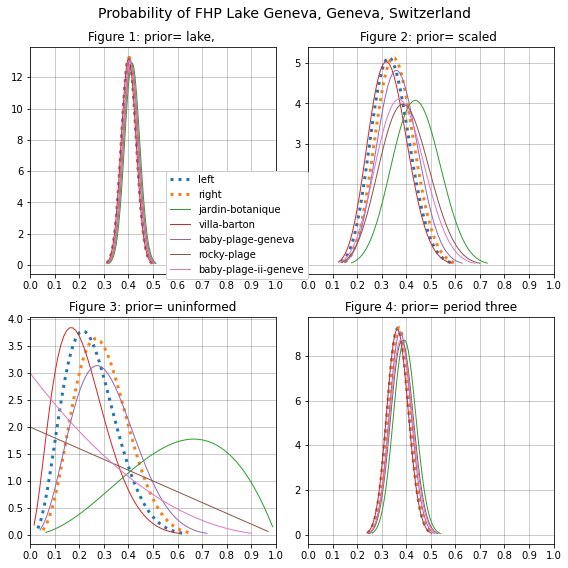

In [8]:


def quad_plots(datas, chart_titles, names, names_toc, suptitle, figsize=(10,10)):
               
    fig, axs = plt.subplots(2,2, figsize=figsize, sharey=False, sharex=False)

    chart_axs = [[0,0], [0,1],[1,0], [1,1]]
    for j,some_data in enumerate(datas):

        row=j%2
        col=int(j%1.5+.5)
        ax=axs[row,col]
        row, col = chart_axs[j]
        ax = axs[row, col]

        for name in names:

            xmin, xmax, xmean = some_data[name]["interval"][0], some_data[name]["interval"][1], some_data[name]["mean"]

            odds_against = (1-xmean)/xmean
            odds_for = xmean/(1-xmean)

            xmax, xmin = 0, 1
            my_range = np.linspace(.35,.45, 10)
            cmap = cm.get_cmap('tab10', 10)

            abeta = some_data[name]["this_dist"]
            new_args = some_data[name]["args"]
            x = np.linspace(beta.ppf(0.001, new_args[0], new_args[1]), beta.ppf(0.999, new_args[0], new_args[1]))
            
            if name in ["left", "right"]:
                linestyle=":"
                linewidth=3
            else:
                linestyle="solid"
                linewidth=1
                

            ax.plot(x, beta.pdf(x, new_args[0], new_args[1],), lw=linewidth, linestyle=linestyle, alpha=1, label=name, color= cmap(names_toc[name]))
            ax.set_title(chart_titles[j])           
            
        ax.set_xlim(0, 1)   
        ax.grid(visible=True, which="both", axis="both", color="black", lw=.5, zorder=0, alpha=0.4)
        x_ticks = np.arange(0,1.1, .1)
        x_ticklabels = [round(x,2) for x in x_ticks]
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticklabels)            

    h, l = ax.get_legend_handles_labels()
    fig.legend(h, l , bbox_to_anchor=[.55,.5], loc="lower right", ncol=1, facecolor='white', framealpha=1)
    plt.suptitle(suptitle, fontsize=14)
    plt.tight_layout()
    plt.show()

# declare variables for charting
names = ["left", "right", "jardin-botanique", "villa-barton", "baby-plage-geneva", "rocky-plage", "baby-plage-ii-geneve"]
names_toc = {x:i for i, x in enumerate([*names])}
chart_titles=["Figure 1: prior= lake, ", "Figure 2: prior= scaled ",   "Figure 3: prior= uninformed",   "Figure 4: prior= period three",]
datas = [ dists_l,  dists_lp, dists_b, dists_gp3]
suptitle = "Probability of FHP Lake Geneva, Geneva, Switzerland"

quad_plots(datas, chart_titles, names, names_toc, suptitle, figsize=(8,8))

### Selecting a survey strategy for End Period Plastics

The succesfull strategy attempts to maximize the time on locations with a higher probability of finding an FHP. Depsite the differences between the priors the posterior distributions are all simmilar. Tables 2 and 5 reaffirm the effects of the lake but at the cost of minimizing the effects  local results. Without the information from the lake uncertainty is maximized, complicating the decision making process. The model that appears to have the best compromise between the lake values and the local values is the scaled model, Table 3 and Figure 2. The range of the 90% HDI is half of the uninformed model and the variance is reduced by an order of magnitude. The locations with fewest samples, (rocky-plage, baby-plage-ii-geneve, jardin-botanique) are the most effected by the prior, with the highest variance, expected value and 90% HDI. However, the repeated sampling at villa-barton and baby-plage suggest that the probability of finding an FHP at Geneva is less than $\theta_{lake}$ and Port Saint Louis, Figure 5. 

The Bayes factor, a ratio of two integrals, was calculated using $\theta_{scaled}$ in the numerator, this ratio compares the marginal probability of the observed results from one model to another,  _Eq.(20)_. The Bayes factor,  is sensitive to changes in the prior distribution, which is what we are testing for, [S4 Computing the integrals](s4). As there was no real predicted difference in accuracy from one model to the other, [S4 Table 6](s4), 1000 simulations of the 250 samples were performed by sampling the posterior distribution of $\theta_{location}$ for each location under case 2. The sample of $\theta_{location}$ is then used to make one draw from the Binomial distribution. Each location was sampled the same number of times as the original data set. The results are within the values predicted by the observed data [S5 Sampling the posterior distribution](s5).

$$
\begin{align}
\frac{P(\theta_{priorone} | Data)}{P(\theta_{priortwo} | Data)} &= 
\frac{P(Data | \theta_{priorone})P(\theta_{priorone})}{P(Data | \theta_{priortwo})P(\theta_{priortwo})} \tag{20} \\
\end{align}
$$

The sampling strategy was devised using the restults from Table 3 and recognizing that the expected values in Geneva are reasonable given the data from the lake and Port Saint Louis, Figure 5. It was concluded that the probability was greatest on the right bank. Therefore the first survey site was villa-barton, the closest to the train station, and if none were found the search would continue at jardin-botanique. There is a substantial gain in travel time on the right bank with some loss in $E[\theta]$ at villa-barton and an accompanying increase $E[\theta]$ at jardin-botanique compared to the left bank.

In [9]:
# results by region

r_names = ["haut_lac", "petite_lac", "grand_lac"]
labels=[{"column": "location", "value":x} for x in T_saint.location.unique()]

# collect all the distributions
regions = {}

# the results by region:
for i,region in enumerate([hlac, plac, glac]):
    
    # for FHP > 0
    threshold="fail"
    locations = dfBeaches[dfBeaches.city.isin(region)].index
    data = T_locations[T_locations.location.isin(locations)].copy()
    labels=[{"column": "location", "value":x} for x in data.location.unique()]
    
    b_updated_one, dists_one = make_posterior_and_array_of_results([data], beta, labels=[labels], prior=prior_one, threshold=threshold)
    b_updated_two, dists_two = make_posterior_and_array_of_results([data], beta, labels=[labels], prior=(1,1), threshold=threshold)
    b_updated_three, dists_three = make_posterior_and_array_of_results([data], beta, labels=[labels], prior=scaled_prior_one, threshold=threshold)
    
    
    regions.update({r_names[i]:{"locations":locations, "data":data, "lake":dists_one, "beta":dists_two, "scaled":dists_three}})
    
    # for FHP > 1
    threshold="plus_two"
        
    b_updated_four, dists_four = make_posterior_and_array_of_results([data], beta, labels=[labels], prior=scaled_prior_one, threshold=threshold)
    regions[r_names[i]].update({"tuples_2":b_updated_four, "plus_two": dists_four})

# the aggregated regional results
regions_agg = {}
for name in r_names:
    a_sum = regions[name]["data"].agg({"loc_date":"sum", "fail":"sum"})
    t, n = a_sum.fail, a_sum.loc_date
    k = n-t
    dist = beta(t+scaled_prior_one[0],k+scaled_prior_one[1])
    av, var = dist.stats()
    five, ninefive = dist.ppf(.05), dist.ppf(.95)
    update= dict(t=t, n=n, k=k, mean=np.round(av,5), var=np.round(var, 5), interval=(round(five,2),round(ninefive,2)))
    regions_agg.update({name:update})
    
# the distribution for the lake    
t_and_n = T_lake.agg({"loc_date":"sum", "fail":"sum"})
t, n = t_and_n.fail, t_and_n.loc_date
k = n-t
dist = beta(1+t, 1+k)
mean, var = dist.stats()
five, ninefive = dist.ppf(.05), dist.ppf(.95)
update= dict(t=t, n=n, k=k, mean=mean, var=var, interval=(round(five,2),round(ninefive,2)))
regions_agg.update({"lake":update})

# the reference value
a = pd.read_csv("resources/plage_napoleon.csv")
t, n = a.trouver.sum(), a["date"].nunique()
k=n-t
dist = beta(9.59+t, 13.64+k)
mean, var = dist.stats()
five, ninefive = dist.ppf(.05), dist.ppf(.95)
update= dict(t=t, n=n, k=k, mean=mean, var=var, interval=(round(five,2),round(ninefive,2)))
regions_agg.update({"port-saint-louis":update})

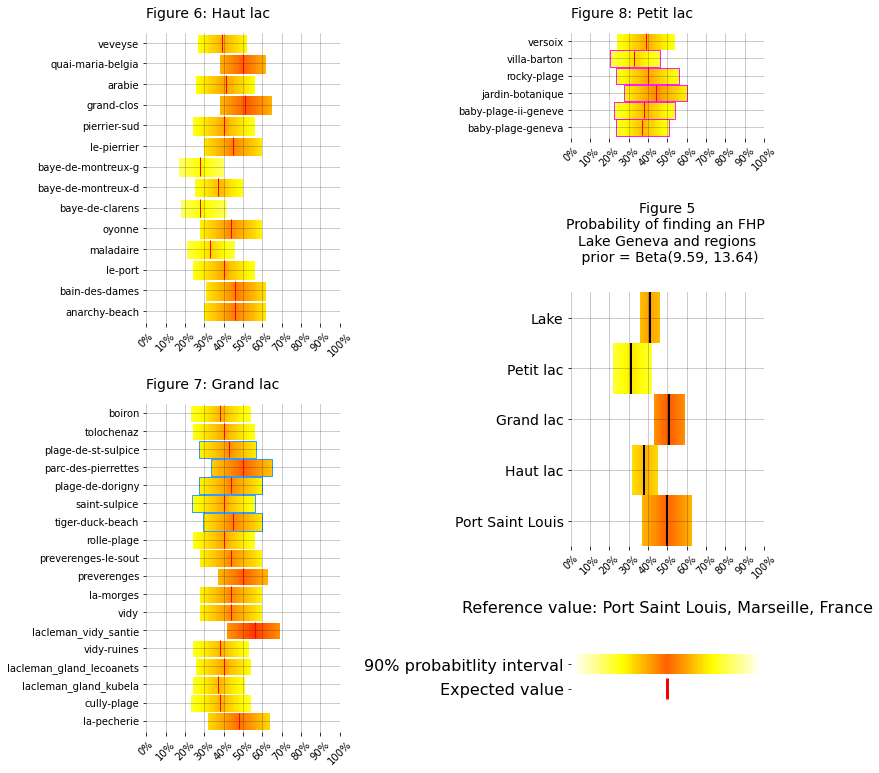

In [10]:
norm = matplotlib.colors.Normalize(vmin=1, vmax=100, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.hot_r)
columnone="scaled"
columntwo="plus_two"

geneve= T_geneva.location.unique()


d_o =[mapper.to_rgba(i) for i in np.arange(0, 101, step=1)]
titles = ["Figure 6: Haut lac", "Figure 7: Grand lac", "Figure 8: Petit lac", "Lake", "Port Saint Louis"]

def make_bounds_from_mean(a_mean, a_range, d_o):
    l_bound = int(a_mean - (a_range/2))
    lower = d_o[l_bound:a_mean]
    
    return [*lower, *lower[::-1]]

def make_row_index(data, r, unique):
    a_row_index = int(len(data[unique])/r*10)

    return a_row_index

def make_an_interval_and_range(data, place):
    interval = data[place]["interval"]
    a_mean = int(np.round(data[place]["mean"],2)*100)
    int_ints = (int(round(interval[0],2)*100), int(round(interval[1],2)*100))
    a_range = int(int_ints[1]) - int(int_ints[0])

    return a_mean, int_ints, a_range

def summarize_for_one_code(data, subplot_names=["haut_lac", "grand_lac", "petite_lac"], 
                           unique="location", figsize=(11,14), r_c =(21,20), titles=titles, d_o=d_o, columnone="scaled",
                          regional_data={}):
    
    fig = plt.figure(figsize=figsize)
    r,c = r_c
    gs = GridSpec(1,2, figure=fig)
        
    rowone = make_row_index(data[subplot_names[0]],r,unique)
    rowtwo = make_row_index(data[subplot_names[1]],r,unique)
    rowthree=make_row_index(data[subplot_names[2]],r,unique)
    
    gs0=gridspec.GridSpecFromSubplotSpec(20,1, subplot_spec=gs[0])
    gs01= gs[1].subgridspec(20,1)
     
    
    ax = fig.add_subplot(gs0[1:rowone+1, :])
    axtwo = fig.add_subplot(gs01[1:rowthree+1, :])
    axthree = fig.add_subplot(gs0[1+rowone+1+1:20,:])
    axfour = fig.add_subplot(gs01[rowthree+1+1+1+1+1:15, :])
    axfive = fig.add_subplot(gs01[17:20, :])
    # rowsix = fig.add_subplot(gs01[rowthree+1: 2+(rowthree+1), :])
    
    
    figtitle = F"Figure 5\nProbability of finding an FHP \nLake Geneva and regions\n prior = Beta(9.59, 13.64)\n"
    axfour.set_title(figtitle, fontsize=14, y=1, pad=15)

    axs = [ax,  axthree, axtwo]
 
    for k, region in enumerate(subplot_names):

        # this is the data
        region_data=data[region][columnone]
                
        # hold tick labels
        place_labels = []
        
        # the datakeys are the identifier
        places = list(region_data.keys())
        
        # group locations in the same city
        cities = dfBeaches.loc[places].city
        cit = cities.sort_values()
        
        axs[k].grid(visible=True, which="both", axis="both", color="black", lw=.5, zorder=0, alpha=0.4)

        for j, place in enumerate(cit.index):
            
            a_mean, int_ints, a_range = make_an_interval_and_range(region_data, place)
            
            intervals = np.arange(int_ints[1] - int_ints[0])
            gridc = np.arange(int_ints[0], int_ints[1]+1, step = 1)
            
            c_norm = make_bounds_from_mean(a_mean, a_range, d_o)           
            
            place_labels.append(place)
            
            for i in intervals:
                
                block = patches.Rectangle((gridc[i], j), 1, .9, linewidth=0, edgecolor="white", facecolor=c_norm[i], alpha=1, zorder=1)
                axs[k].add_patch(block)
            if place in saint_sulpice:
                edge_color = "dodgerblue"
                lw = 1.8
                frame = patches.Rectangle((gridc[0], j), a_range, .9, linewidth=lw, edgecolor=edge_color, facecolor="white", alpha=1, zorder=0)
                axs[k].add_patch(frame)
                
            elif place in geneve:
                edge_color = "magenta"
                lw = 1.8
                frame = patches.Rectangle((gridc[0], j), a_range, .9, linewidth=lw, edgecolor=edge_color, facecolor="white", alpha=1, zorder=0)
                axs[k].add_patch(frame)
            else:
                pass          
                   
            # axs[k].scatter([a_mean], [j+.5], marker="|", s=200, c="red")
            axs[k].vlines(x=a_mean, ymin=j+.05, ymax=j+.95, color="red", linewidth=1, label="Expected value")
        b=axs[k].get_xticks()
        c=axs[k].get_yticks()

        y_ticks = [x+.5 for x in np.arange(len(place_labels))]
        x_ticks = np.arange(0,101, 10)
        x_ticklabels = [f"{x}%" for x in x_ticks]

        axs[k].set_xticks(x_ticks)
        axs[k].set_xticklabels(x_ticklabels)
        axs[k].set_title(titles[k], fontsize=14, loc="left", pad=15)
        axs[k].set_yticks(y_ticks)
        axs[k].set_yticklabels(place_labels)
        axs[k].set_xlim(0,100)
        axs[k].set_ylim(-.1,len(cit.index))
        axs[k].tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False, labelrotation=45)
        axs[k].margins(0)
        axs[k].spines['left'].set_visible(False)
        axs[k].spines["bottom"].set_visible(False)
        axs[k].spines["top"].set_visible(False)
        axs[k].spines["right"].set_visible(False)
        
    axfourlabels=[]
    axfour.set_xlim(0,100)
    axfour.set_ylim(0,5)
    for num, sname in enumerate(["port-saint-louis",*subplot_names, "lake"]):        

        a_mean, int_ints, a_range = make_an_interval_and_range(regional_data, sname)

        intervals = np.arange(int_ints[1] - int_ints[0])
        gridc = np.arange(int_ints[0], int_ints[1]+1, step = 1)

        c_norm = make_bounds_from_mean(a_mean, a_range, d_o)

        

        for i in intervals:
            block = patches.Rectangle((gridc[i], num), 1, 1, linewidth=0, edgecolor="white", facecolor=c_norm[i], alpha=1, zorder=1)
            axfour.add_patch(block)
        axfour.vlines(x=a_mean, ymin=num, ymax=num+1, color="black", linewidth=2, label="Expected value")
    
    
    axfour.set_xlabel("Reference value: Port Saint Louis, Marseille, France", fontsize=16, labelpad=20)
    # block for legend    
    legend_int = np.arange(100)
    gridc = np.arange(0, 100, step = 1)

    c_norm = make_bounds_from_mean(50, 99, d_o)    

    for i in legend_int:
        block = patches.Rectangle((gridc[i], .52), 1, .2, linewidth=0, edgecolor="white", facecolor=c_norm[i], alpha=1, zorder=1)
        axfive.add_patch(block)
    
    axfive.vlines(x=50, ymin=.28, ymax=0.48, color="red", linewidth=3, label="Expected value")
    axfive.set_yticks([.38, .62])
    axfive.set_yticklabels(["Expected value", "90% probabitlity interval"], size=16)
         
    axfive.set_ylim(-0.05,1)
    
    axfive.margins(0)
    axfive.spines['left'].set_visible(False)
    axfive.spines["bottom"].set_visible(False)
    axfive.spines["top"].set_visible(False)
    axfive.spines["right"].set_visible(False)
    axfive.set_xticks([])
   
    
    a=axfour.get_yticks()
    axfour.set_yticks([x+.5 for x in np.arange(len([*subplot_names, "lake", "one"]))])
    axfour.set_yticklabels(["Port Saint Louis","Haut lac", "Grand lac", "Petit lac", "Lake" ], size=14)
    axfour.grid(visible=True, which="both", axis="both", color="black", lw=.5, zorder=0, alpha=0.4)
    axfour.set_xticks(x_ticks)
    axfour.set_xticklabels(x_ticklabels)
    axfour.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False, labelrotation=45)    
    
    axfour.margins(0)
    axfour.spines['left'].set_visible(False)
    axfour.spines["bottom"].set_visible(False)
    axfour.spines["top"].set_visible(False)
    axfour.spines["right"].set_visible(False)   
  
    plt.tight_layout()
    

    plt.show()
    
summarize_for_one_code(regions, regional_data=regions_agg, subplot_names=["haut_lac", "grand_lac", "petite_lac"], unique="locations", figsize=(11,11), r_c =(20,21), titles=titles, d_o=d_o)

## ENVIRONMENTAL POLICY IMPLICATIONS 

The introduction of a litter threshold and the incorporation of the risk of marine-litter in LCA are important developments in the domain of marine-litter reduction and should have far reaching consequences in manufacturing and product development. However, measuring effectivenss by quantity may not be adequate for all objects. FHP are a very small portion of the total objects found yet the probability of finding one at a survey ranges from .35 -.45 for the lake and in some locations ranges from .40 - .60. Having found an FHP on the survey with End Period Plasitcs gives cause both to the method of assessment and the accuracy. These values are within the expected range of Port Saint Louis, the next location in the river basin which discharges into the Ocean. Consequently we assume that the odds of finding an FHP at a litter-survey in the Rhône basin are between 3/10 and 6/10 with the odds increasing in areas of low water velocity and immediately downstream of urban centers or dischage points. 

Monitoring schedules or cadence should be characterized by the scale of the intended use of the data. For example the density of points used to describe $\theta_{lake}$ is much greater than rocky-plage as a result we are confident about $\theta_{lake}$ given the data however if we consider rocky-plage only on the results from rocky-plage then we are much less confident, Figure 3. The best inferences that can be made about any location include the results of other locations in proximity. In the case of Geneva there were two sets of data (baby-plage-geneva, villa-barton) of $\approxeq$ length that described two logical divisions of the area under study. Putting the results from neighboring locations with fewer surveys in to a broader context immediately. This allows for a better understanding of whats happening at a local level in relation to regional or national trends. The advantage of sampling one location multiple times needs to be weighed against having many different sources of information from a defined geographic area. 

The chance of an encounter is in the spirit of the data generating process that is called a _beach litter survey_. At its best implementation a beach-litter-survey is the definition of the minimum number of objects encountered, it should never be confused with the _actual_ number that was present. The magnitude of the encounter can be measured in p/100m, the progression from the Binomial distribution to the Negative Binomial (NB) distribution is automatic. For example in this analysis the only probability that was considered was FHP = 0 or FHP > 0, this operation can be repeated for all integer values. Given that the Beta distribtuion is also the conjugate prior to the NB and that it is already a recommended method for determining extreme values from a set of beach-litter data {cite}`eubaselines` there is ample reason to measure encounters and magnitude with the same method if possible. 

In the simple model presented here the prior was scaled based on minimizing the paramaters of the Beta distribution of the prior. This may not always be appropriate or adviseable, a weighted average of both models may be a better indicator. Using the Bayes factor to evaluate model performance is appropriate in this case because the changes that are being evaluated are the changes in the prior. Developing more sophisticated models will mean changing the method of testing. Ulitmately the best way to simplify the model is to sample in such away that the number of samples is considered from the standpoint of the lowest administrative level that will use the data. For example a unified monitoring scheme for Lake Geneva would include a strategy that ensures the data is appropriate for use at the municipal level.

Application to the LCA is obvious in the context of risk. Determining the number consumed v/s the number found for any particular location or object would be problematic and relying on aggregate values that can not readily be verified or updated introduces ambiguity into the model that is best avoided. Land use statistics can be proxies for other independent variables that are difficult to measure and maybe a good indicator.  Spearmans $\rho$ has been used to estimate the effects of different levels of land use on the survey results for the most common litter items {cite}`iqaasl`. Rank based hypothesis testing can be implemented for probabilistic models {cite}`bayesrankedsumtest`, this could lead to easier implementation within the context of existing processes such as LCA. 

Finally, if the source of the data (citizen-science and activism) is considered and its traditional use as an early warning system for researchers and regional authorities then unilikely encounters should have a particular significance. Incorporating the probability of a result as a matter of practice is the realization of the relationship between activism citizen-science and environmental stewardship.  Building consensus based on the significance of survey results that were collected according to a protocol by concerned members of the community and analyzed in a transparent manner is a logical extension of the data collection process.

## Supporting figures and calculations

(s1)=
### S1: Survey locations, number of samples and the number of times an FHP was identified

In [11]:
# location summary
data = T_locations.groupby(["city", "location"]).agg({"loc_date":"sum", "fail":"sum"})

data.rename(columns={"loc_date":"samples", "fail":"FHP"})

samples  FHP
city               location                              
Allaman            la-pecherie                     3    3
Bourg-en-Lavaux    cully-plage                     2    0
Genève             baby-plage-geneva              11    3
                   baby-plage-ii-geneve            2    0
                   jardin-botanique                3    2
                   rocky-plage                     1    0
                   villa-barton                   12    2
Gland              lacleman_gland_kubela          11    3
                   lacleman_gland_lecoanets       11    4
La Tour-de-Peilz   anarchy-beach                   2    2
                   bain-des-dames                  4    3
                   le-port                         1    0
                   maladaire                      15    3
                   oyonne                          3    2
Lausanne           lacleman_vidy_santie           12   10
                   vidy                            1    1
                   vidy-ruines                     7    2
Montreux           baye-de-clarens                13    1
                   baye-de-montreux-d             16    5
                   baye-de-montreux-g             18    2
                   le-pierrier                     5    3
                   pierrier-sud                    1    0
Morges             la-morges                       1    1
Préverenges        preverenges                    14    9
                   preverenges-le-sout             1    1
Rolle              rolle-plage                     1    0
Saint-Gingolph     grand-clos                     13    9
Saint-Sulpice (VD) parc-des-pierrettes             4    4
                   plage-de-dorigny                1    1
                   plage-de-st-sulpice             4    2
                   saint-sulpice                   1    0
                   tiger-duck-beach                5    3
Tolochenaz         boiron                          2    0
                   tolochenaz                      1    0
Versoix            versoix                         4    1
Vevey              arabie                          5    2
                   quai-maria-belgia              22   13
                   veveyse                        17    6

(s2)=
### S2: Expected values holding the data constant and changing $\theta$

In [12]:
# the different probabilities of having 103 successes given different values of theta
theta_vals = [.2, .3, .5, .7]
surveys = 250

# loop through the different possible values of theta
my_dists = [binom(surveys, x) for x in theta_vals]
my_stats = [x.stats() for x in my_dists]

for i, each_val in enumerate(theta_vals):
    print(f"Given theta={each_val}, and the number of surveys = {surveys}, the expected number of positive surveys = {my_stats[i][0]}")

Given theta=0.2, and the number of surveys = 250, the expected number of positive surveys = 50.0
Given theta=0.3, and the number of surveys = 250, the expected number of positive surveys = 75.0
Given theta=0.5, and the number of surveys = 250, the expected number of positive surveys = 125.0
Given theta=0.7, and the number of surveys = 250, the expected number of positive surveys = 175.0


(s3)=
### S3: Scaling the prior, minimizing $\alpha$, $\beta$

Suppose we weren't given the the survey results, but we were given the the value of t/n for a given period. Consider the equality _500/1000 = 50/100 = 5/10 = 1/2 = .5_ and now substitute t for the numerator and n for the denominator. Different parameters of the Beta distribution can produce similar results.

```python
from scipy import optimize

# scaled prior
def minimize_alpha_beta(x, mu, var):
    
    alpha, beta = x[0], x[1]
    
    # define the mean and variance in terms of the parameters
    # mean or mu
    m = alpha/(alpha+beta)
    
    # standard deviation
    v =  (alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1))
    
    return [m - mu, v - var]


# get the mean from the lake posterior and set variance to a limit
mu = dists_lk["lake"]["mean"]
var = 0.01

# alpha beta minimized
scaled = optimize.root(minimize_alpha_beta, [1, 1], args=(mu, var)).x

# returns
[4]: array([ 9.5079, 13.6821])

```

The parameters of the Beta distribution can be described in terms of the mean and variance. The function `minimize_alpha_beta` starts from one and looks for the smallest values of $\alpha$, $\beta$ that produce the same results as the proposed arguments, `args=(mu, var)` which are $E[\theta_{lake}]$, $E[Var(\theta)]$. The variance is increased by one order of magnitude which results in smaller values of $\alpha$, $\beta$ but an increase in variance and the range of the 90% HDI, Figure S3.

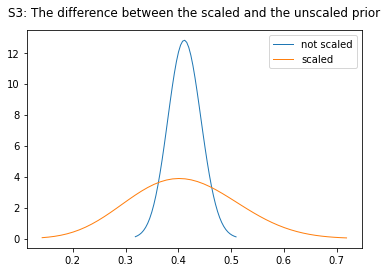

In [13]:
not_scaled = beta(103, 147)

scaled = beta(9.5079, 13.6821)

names = ["not scaled", "scaled"]

linewidth = 1
linestyle = "-"
cmap = cm.get_cmap('tab10', 10)

fig, ax = plt.subplots()
for i,the_data in enumerate([not_scaled, scaled]):
    
    x = np.linspace(the_data.ppf(0.001), the_data.ppf(0.999))
    ax.plot(x, the_data.pdf(x), lw=linewidth, linestyle=linestyle, alpha=1, label=names[i], color= cmap(i))
    ax.set_title("S3: The difference between the scaled and the unscaled prior", pad=14)

ax.legend()
plt.show()

(s4)=
### S4: Computing the integrals for marginal probabiltity

The marginal probability is the integral of the _Likelihood X the Prior_. Another good explanantion is _it is the probability of the data given $\theta$ times the probablity of $\theta$_ for different values of $\theta$.

```python
from scipy import integrate

def f_marginal_prob(x,pt,pk,et,n):
    """The marginal probability is the Intgral of one function times another.  
    
    """
        
    # the probability of theta under the prior
    a = beta.pdf(x, pt, pk)    
    # the probability of t given n and theta
    b = binom.pmf(et, n, x)
   
    return a*b
```

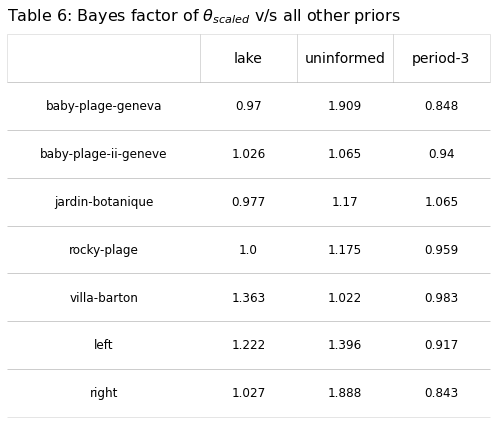

In [14]:
# bayes factor to compare one to the other
# the marginal probability of the data under the different
# values of theta times the probability of theta under the conditions of the prior
from scipy import integrate

def f_marginal_prob(x,pt,pk,et,n):
    """The marginal probability is the Intgral of one function times another.  
    
    """
        
    # the probability of theta under the prior
    a = beta.pdf(x, pt, pk)    
    # the probability of t given n and theta
    b = binom.pmf(et, n, x)
   
    return a*b

def variables_marginal_prob(dt):
    pt=dt[5][0]
    pk=dt[5][1]
    et=dt[4][0]
    n=np.sum(dt[4])
    
    return pt, pk, et, n


def collect_marginal_probabilities(data):
    
    marginals = []
    
    for i, anarray in enumerate(data):
        this_marginal = []
        for atuple in anarray:            
            these_vars = variables_marginal_prob(atuple)
            k = integrate.quad(f_marginal_prob,0,1, args=these_vars)
            this_marginal.append([atuple[0], k[0], k[1], these_vars])
        marginals.append(this_marginal)
    
    return marginals

def make_bfs(marginals, index=1):
    
    m_one = marginals[index]
    
    bfs = []
    
    for i,marginal in enumerate(m_one):
        
        numerator = marginal[1]
        didx = [i for i in np.arange(len(marginal)) if i != index]
        denominators = [marginals[x][i][1] for x in didx]
        labels = [marginals[x][i][0] for x in didx]
                
        factors = [numerator/denominator for denominator in denominators]
        bfs.append([labels[0], *factors])
    
    return bfs
    
marginals = collect_marginal_probabilities(data_tuples)
bfs = make_bfs(marginals)

new_data = pd.DataFrame(bfs, columns=["location","lake", "uninformed", "period-3"])
new_data[["lake", "uninformed", "period-3"]] = new_data[["lake", "uninformed", "period-3"]].round(3)
chart_title=r"Table 6: Bayes factor of $\theta_{scaled}$ v/s all other priors"

figsize=(7,6)


fig, ax = plt.subplots(figsize=figsize)

a_simple_formatted_table(ax,new_data.values,colLabels=["", *new_data.columns[1:]], a_color="black", colWidths=[.4, *[.2]*3], font_size=14, bbox=[0,0,1,1])
remove_spines(ax)
remove_ticks(ax)
ax.set_title(chart_title, fontsize=16, pad=14, loc="left")
plt.tight_layout()

plt.show()

(s5)=
### S5: Drawing samples from the posterior distribution of each location

The marginal probability is the integral of the _Likelihood X the Prior_. Another good explanantion is _it is the probability of the data given $\theta$ times the probablity of $\theta$_ for different values of $\theta$.

```python
def draw_samples_from_each_location(nsamps, r_names, a_prior="scaled", prior_args=(9.59, 13.64)):
    sim_results = []    
    # repeat all the samples n times
    for j in np.arange(nsamps):        
        # the results of one cycle get stored here
        mcmc_samples = []        
        # for each region
        for name in r_names:
            # collect the data for the region
            data = regions[name]
            # for each prior
            for prior in [a_prior]:
                these_results = data[prior]
                # for each location
                for a_beach in these_results:
                    # collect the args that were used to calculate the posterior
                    a, b = data[prior][a_beach]["args"]
                    # get the t,n for that location
                    t, n = int(a-prior_args[0]), int(b-prior_args[1]+a-prior_args[0])
                    # sample each location n times
                    # draw a sample for theta
                    # use the sample theta to look for FHP
                    for i in np.arange(n):                        
                        # get the dist for that location and draw a sample for theta
                        theta = data[prior][a_beach]["this_dist"].rvs()
                        # use that theta for one sample
                        draw = binom.rvs(1, theta)
                        # store the result
                        mcmc_samples.append(draw)
        
        sim_results.append(mcmc_samples)
    
    return sim_results

```

In [15]:
def draw_samples_from_each_location(nsamps, r_names, a_prior="scaled", prior_args=(9.59, 13.64)):
    sim_results = []    
    # repeat all the samples n times
    for j in np.arange(nsamps):        
        # the results of one cycle get stored here
        mcmc_samples = []        
        # for each region
        for name in r_names:
            # collect the data for the region
            data = regions[name]
            # for each prior
            for prior in [a_prior]:
                these_results = data[prior]
                # for each location
                for a_beach in these_results:
                    # collect the args that were used to calculate the posterior
                    a, b = data[prior][a_beach]["args"]
                    # get the t,n for that location
                    t, n = int(a-prior_args[0]), int(b-prior_args[1]+a-prior_args[0])
                    # sample each location n times
                    # draw a sample for theta
                    # use the sample theta to look for FHP
                    for i in np.arange(n):                        
                        # get the dist for that location and draw a sample for theta
                        theta = data[prior][a_beach]["this_dist"].rvs()
                        # use that theta for one sample
                        draw = binom.rvs(1, theta)
                        # store the result
                        mcmc_samples.append(draw)
        
        sim_results.append(mcmc_samples)
    
    return sim_results

nsamps = 1000
        
sim_scaled =   draw_samples_from_each_location(nsamps, r_names)

sim_t, sim_k, sim_tn = [sum(x) for x in sim_scaled], [250-sum(x) for x in sim_scaled], [sum(x)/250 for x in sim_scaled]

print(f"Predicted number of samples with FHP = {int(np.mean(sim_t))}")
print(f"Predicted number of samples without FHP = {int(np.mean(sim_k))}")
print(f"Average value of t/n over {nsamps} samples = {round(np.mean(sim_tn),2)}")
print(f"Variance of t/n over {nsamps} samples = {round(np.var(sim_tn),4)}")
print(f"Variance of sim_t over {nsamps} samples = {int(np.var(sim_t))}")

Predicted number of samples with FHP = 101
Predicted number of samples without FHP = 148
Average value of t/n over 1000 samples = 0.41
Variance of t/n over 1000 samples = 0.001
Variance of sim_t over 1000 samples = 59


In [16]:
g_lac = dfBeaches[dfBeaches.city.isin(glac)].copy()
g_lac["region"] = "grand-lac"
p_lac = dfBeaches[dfBeaches.city.isin(plac)].copy()
p_lac["region"] = "petit-lac"

mapvals = pd.concat([g_lac, p_lac])
mapvals.to_csv("resources/mapvals.csv", index=False)

author = "roger@hammerdirt.ch"
my_message = "\u2764\ufe0f what you do."
md(F"""
<br></br>
**Hammerdirt everyday.**<br>

>{my_message}<br>

*{author}* pushed the run button.<br>
This document originates from https://github.com/hammerdirt-analyst/ all copyrights apply.<br>
""")


<br></br>
**Hammerdirt everyday.**<br>

>❤️ what you do.<br>

*roger@hammerdirt.ch* pushed the run button.<br>
This document originates from https://github.com/hammerdirt-analyst/ all copyrights apply.<br>
